In [1]:
import gym
import numpy as np
import numpy.random as rnd
import matplotlib.pyplot as plt
from IPython.display import clear_output
import itertools
from helper import plot_rewards, plot_iters
import matplotlib.style
matplotlib.style.use('dark_background')
np.random.seed(23)

In [2]:
%matplotlib inline
env=gym.make('FrozenLake-v0')

In [3]:
# https://zitaoshen.rbind.io/project/rl/1-min-of-reinforcement-learning-q-learning/

Q = np.zeros([env.observation_space.n,env.action_space.n])
alpha=0.8
gamma=0.65
episodes=10000
beta=0.3
G=[]
iters_arr = []
iters_arr2 = []
for episode in range(episodes):
    s=env.reset()
    env.render()
    print('Episode #: ', episode)
    G_episode=0
    done=False
    episode_length=0
    epsilon = (1/(1+episode))**(beta)
    for episode_length in itertools.count():
        if rnd.rand() < epsilon:
            a = env.action_space.sample()
        else:
            a = np.argmax(Q[s,:])
        s_prime,r,done,_=env.step(a)
        
        Q[s,a]=Q[s,a]+alpha*(r+gamma*np.max(Q[s_prime,:])-Q[s,a])
        G_episode+=r
        s=s_prime
        episode_length+=1
        
        if done == True:
            break
    G.append(G_episode)
    clear_output(wait=True)
    iters_arr.append(episode_length)
print (sum(G)/episodes)
rewards_arr = np.cumsum(G)/np.arange(1,episodes+1)
iters_arr2 = np.cumsum(iters_arr)/np.arange(1,episodes+1)

0.094


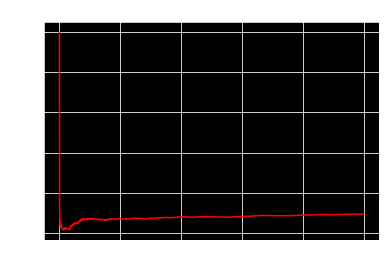

In [4]:
plot_rewards(rewards_arr, 'Rewards per Episode', 'Rewards')

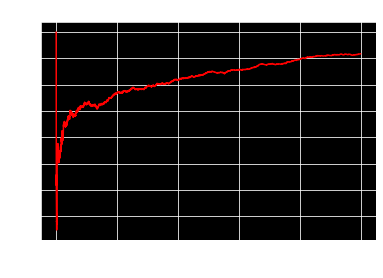

In [5]:
plot_iters(iters_arr2, 'Iterations per Episode', 'Iterations')